In [7]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import wordcloud

In [9]:
# Load sentiments from file
path = r'C:\Users\USER\Desktop\social\comments\\'

politics_comments = pd.read_table(path+"politics_comments.txt", sep='\n',
                   header=None, names=["comments"])
education_comments = pd.read_table(path+"education_comments.txt", sep='\n',
                   header=None, names=["comments"])
health_comments = pd.read_table(path+"Health_comments.txt", sep='\n',
                   header=None, names=["comments"])
print("Politics:\t", politics_comments.shape)
print("Education:\t", education_comments.shape)
print("Health:\t", health_comments.shape)

Politics:	 (2673, 1)
Education:	 (3577, 1)
Health:	 (4879, 1)


In [10]:
#load the encoder and model from file.
encoder = None
model = None
with open('encoder_model', 'rb') as f:
    encoder_model = pickle.load(f)
    encoder, model = encoder_model['encoder'], encoder_model['model']

In [11]:
wc_stopwords = wordcloud.STOPWORDS
nltk_stopwords = set(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd",
                      'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 
                      'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 
                      'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 
                      'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 
                      'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 
                      'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 
                      'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 
                      'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 
                      'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 
                      'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain',
                      'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', 
                      "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', 
                      "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't",
                      'wouldn', "wouldn't"])
pidgin_stopwords = set(['plz', 'abeg', 'pple', 'ppos', 'pple', 'dey', 'wan', 'wey', 'dis', 'dat', 'den', 'wetin', 'u', 'coz', 
                        'wtf', 'sabi', 'abi', 'diz', 'becuz', 'lol', 'lols', 'lolz', 'b4', 'urself', 'joor', 'deh', 'una', 
                        'abt', 'wat', 'tho'])

stop_words = wc_stopwords|nltk_stopwords|pidgin_stopwords
len(stop_words)

256

In [12]:
word_cloud = wordcloud.WordCloud(stopwords=stop_words)
def generate_wordCloud(data, category):
    """
    Generate word cloud for the comments in the given category.
    The bigger the text shows it has a higher frequency.
    """
    print(category+' word cloud:\n')
    text = """ """.join([comment for comment in data['comments']])
    word_cloud.generate(text)
    display(word_cloud.to_image())

Politics word cloud:



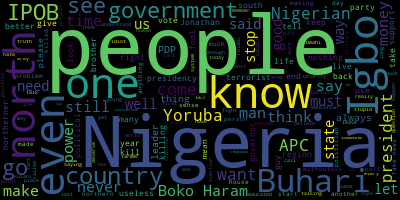

In [13]:
generate_wordCloud(politics_sentiments, 'Politics')

Education word cloud:



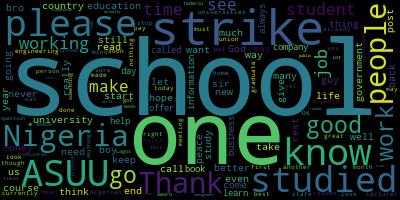

In [14]:
generate_wordCloud(education_sentiments, 'Education')

Health word cloud:



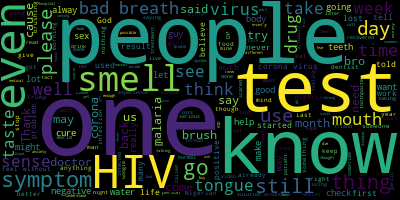

In [15]:
generate_wordCloud(health_sentiments, 'Health')

In [18]:
def get_emotion(data):
    """Get emotion for each comment in the data."""
    transformed = encoder.transform(data['comments'])
    data['emotions'] = list(model.predict(transformed))
    return data

In [19]:
politics_data = get_emotion(politics_comments)
health_data = get_emotion(health_comments)
education_data = get_emotion(education_comments)
display(education_data.head())

,comments,emotions
0,Rip beautiful soul,fear
1,Rip,anger
2,Omg! Such a brilliant chap! Would have been a ...,joy
3,"No way dear, Nigeria is not made for saints ...",sadness
4,She was already a MEDICAL DOCTOR.,anger


In [69]:
def plot_stats(data, category):
    fig = plt.figure()
    ax = plt.axes()
    class_name = ['fear', 'anger', 'joy', 'sadness', 'neutral']
    d = {k:len(data[data['emotions']==k]) for k in class_name}
    frame = pd.DataFrame(d, index=range(1))
    for feature in (class_name):
        ax.bar(feature,frame[feature])
    plt.legend(class_name)
    plt.title(category+' emotion classifier')
    fig.tight_layout()

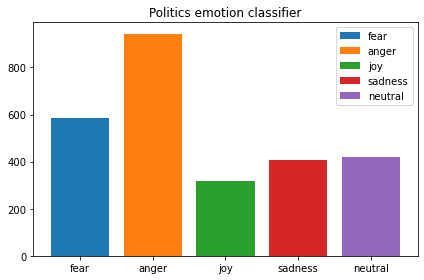

In [70]:
plot_stats(politics_data, 'Politics')

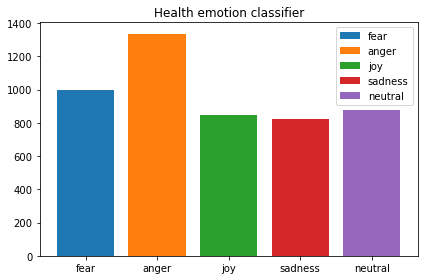

In [71]:
plot_stats(health_data, 'Health')

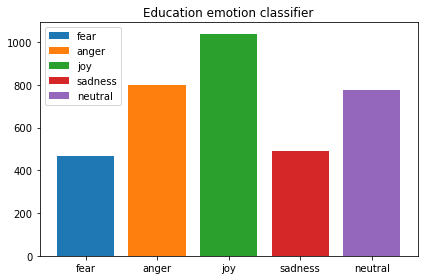

In [72]:
plot_stats(education_data, 'Education')

In [17]:
transformed = encoder.transform([
    "When the rabid dog does not find it's usual diet, it will attack it's owner.",
    "These are signs of a failed state when government can't provide security for the people.Security of lives & property is government first priority.",
    "Its safe to say, the republic may soon be declared a failed state if it continues in this direction. A pity to the lives lost.",
    "Thank you,   very helpful!",
    "Nigeria my country I love you with my whole heart",
    "this country is joke.",
    "You must really be a slowpoke, this stupid boy."
                                ])
list(model.predict(transformed))

['fear', 'fear', 'sadness', 'joy', 'sadness', 'neutral', 'anger']